# **API-4 Vasquez Jorge Luis - Machine Learning**

### Situación
##### Anteriormente, trabajamos con temas relacionados al aprendizaje supervisado, el cual tiene la particularidad de contar con etiquetas de salida para realizar las predicciones de datos del Titanic.
En esta ocasión, nos enfrentamos al desafío de generar predicciones de tipo no supervisado, por lo cual no contamos con una variable de salida objetivo. Para ello, tendremos como foco la agrupación de datos que cumplan con patrones similares y que nos permitan tomar decisiones a posteriori.
En este caso, el “Vivero de San Juan” necesita realizar un estudio que le permita clasificar su nueva flor del iris dentro del vivero, y para ello se han solicitado nuestra ayuda.
Iris es un género de plantas rizomatosas de la familia Iridaceae. Constituye el mayor género de la familia, con más de 300 especies, además de muchos híbridos y cultivares. Además del nombre del género, iris se usa comúnmente para referirse a todas las especies, así como a otros varios géneros estrechamente emparentados y a una subdivisión dentro del género.
La flor del iris es de especial interés como ejemplo de la relación entre las plantas florales y los insectos polinizadores. La forma de la flor y la posición de los receptores del polen y los estigmas en los pétalos exteriores forman una pista de aterrizaje para un insecto volador, el cual, al sondear el néctar, entrará primero en contacto con el periantio y después con los tres estambres sobre una superficie en espiral que nace en el ovario formado por los tres carpelos.
La proyección transversal en forma de repisa sobre la espiral interior, situada a los lados de los estambres y por debajo el estilo arqueado bajo el estigma, permite que el insecto entre en contacto con la superficie cubierta de polen solamente tras pasar este, mientras que, al salir de la flor, toma contacto con la cara inferior no receptiva del estigma. De este modo, un insecto que transporte polen de una flor visitada anteriormente y entre en otra, depositará el polen sobre el estigma y, cuando salga de ella, el polen que lleva no se frotará ni se quedará adherido al estigma de la misma flor.

### Consigna
##### El desafío actual consiste en poder generar agrupaciones mediante K-means que permitan calcular el grado de precisión de una predicción no supervisada. Para ello, nos solicitan analizar la base de datos de la flor del iris y clasificar información según el orden que se presenta a continuación.



##### Importamos las librerias necesarias para el proyecto

In [10]:
# Importar linrerias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline


#### Consigna 1:
##### Debemos describir brevemente la información que nos entrega la base de datos. Para ello, puede ser útil cargar la base mediante el siguiente código:
from sklearn import datasets

iris = datasets.load_iris()

In [11]:
# importamos el dataset de iris
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
# Revisamos las llaves del diccionario
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
# Revisamos los nombres de las características
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# Pasar el dataset a un DataFrame
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [15]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## IRIS

#### Consigna 2:
##### Ahora, debemos graficar las relaciones con las cuales buscaremos realizar el agrupamiento de clusters (por ejemplo, largo del sépalo versus ancho del sépalo).

#### Gráfico de pétalos

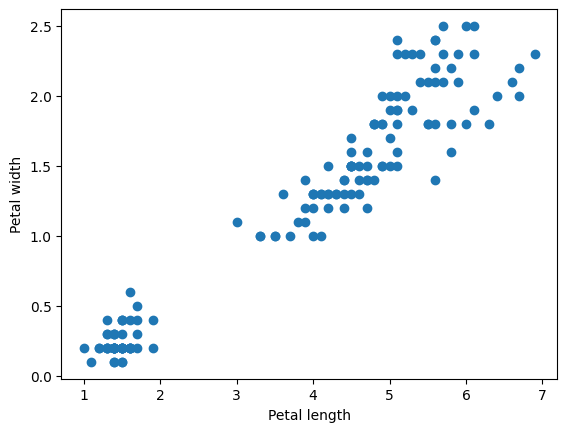

In [17]:
# Grafico de pétalos

plt.scatter(df_iris["petal length (cm)"], df_iris["petal width (cm)"])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

#### Gráfico de Sépalos

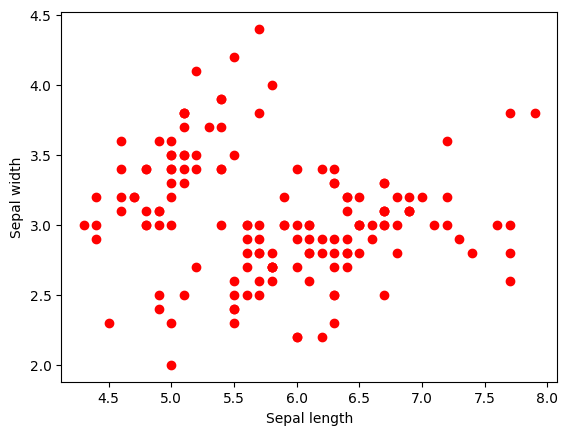

In [18]:
plt.scatter(df_iris["sepal length (cm)"], df_iris["sepal width (cm)"], c = "red")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

### Consigna 3: 
##### Lo siguiente es entrenar el modelo y determinar los centros de cada cluster, su inercia y etiqueta.

### Llamamos a K-Means

In [19]:
# Importamos KMeans
from sklearn.cluster import KMeans

In [20]:

# Configurar el Objeto K-Means

# Llamamos al modelo.
# n_clusters=5: Le pedimos (como en el ejemplo de clase).
# n_init=10: Hará 10 intentos con semillas aleatorias para encontrar el mejor resultado.
# random_state=42: Para asegurar que siempre nos de el mismo resultado (reproducibilidad).

print("\n     Configurando K-Means (K=5) ")
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)


     Configurando K-Means (K=5) 


### Entrenando el modelo

In [21]:

#Entrenar el Modelo

# Nota: le pasamos 'X' (data), no hay 'y' (etiquetas).

print("\n--- Entrenando el modelo... ---")
kmeans.fit(df_iris)
print("¡Modelo entrenado exitosamente!")


--- Entrenando el modelo... ---
¡Modelo entrenado exitosamente!


### Revisando atributos

In [22]:

# Revisar Atributos del Modelo

# inspeccionamos qué aprendió el modelo.

print("\n--- Resultados del Modelo ---")

# 1. Centroides: Las coordenadas centrales de cada uno de los 5 grupos.
print("\nCoordenadas de los 5 Centroides (Cluster Centers):\n")
print(kmeans.cluster_centers_)


--- Resultados del Modelo ---

Coordenadas de los 5 Centroides (Cluster Centers):

[[6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.006      3.428      1.462      0.246     ]
 [5.52962963 2.62222222 3.94074074 1.21851852]
 [6.22972973 2.85135135 4.76756757 1.57297297]
 [7.475      3.125      6.3        2.05      ]]


In [23]:
#  Etiquetas: A qué grupo (0, 1, 2, 3, 4) asignó cada flor.

print("\nEtiquetas asignadas:")
print(kmeans.labels_)


Etiquetas asignadas:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 4 0 0 4 2 4 0 4 0
 0 0 3 0 0 0 4 4 3 0 3 4 3 0 4 3 3 0 4 4 4 0 3 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]


In [24]:
# Inercia: La suma de las distancias al cuadrado dentro de los clusters.
# Mide qué tan "compactos" son los grupos (menor es mejor).
print(f"\nInercia del modelo (Distancia intra-cluster): {kmeans.inertia_:.2f}")


Inercia del modelo (Distancia intra-cluster): 46.46


### Asigno clusters

In [25]:

# Visualización y Análisis (Asignando Clusters)

# Agregamos la columna 'Cluster' a nuestro DataFrame original para poder graficar.

df_iris['Cluster'] = kmeans.labels_
df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


### Consigna 4:
##### Debemos, además, graficar los clusters.


Generando gráfico para PÉTALOS...


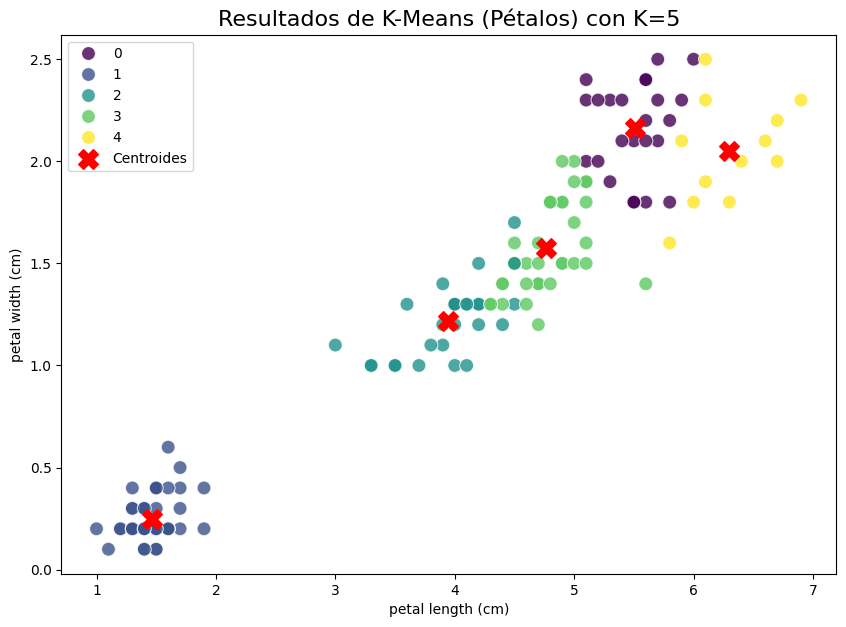

In [27]:
# -------------------------------------------------------
# GRÁFICO 1: PÉTALOS (Petal Length vs Petal Width)
# -------------------------------------------------------
print("\nGenerando gráfico para PÉTALOS...")
plt.figure(figsize=(10, 7))

# Usamos seaborn para facilitar el coloreado por categoría (hue)
sns.scatterplot(
    data=df_iris,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='Cluster',       # Colorear según el grupo asignado
    palette='viridis',   # Paleta de colores distintiva
    s=100,               # Tamaño de los puntos
    alpha=0.8            # Transparencia
)

# También graficamos los CENTROIDES para ver dónde quedaron
# Nota: En iris.data, las columnas son [sepal_len, sepal_wid, petal_len, petal_wid]
# Por lo tanto, Pétalos son índices 2 y 3.
plt.scatter(
    kmeans.cluster_centers_[:, 2], # X del centroide (Largo Pétalo)
    kmeans.cluster_centers_[:, 3], # Y del centroide (Ancho Pétalo)
    c='red', s=200, marker='X', label='Centroides' # Marca roja grande
)

plt.title('Resultados de K-Means (Pétalos) con K=5', fontsize=16)
plt.legend()
plt.show()


Generando gráfico para SÉPALOS...


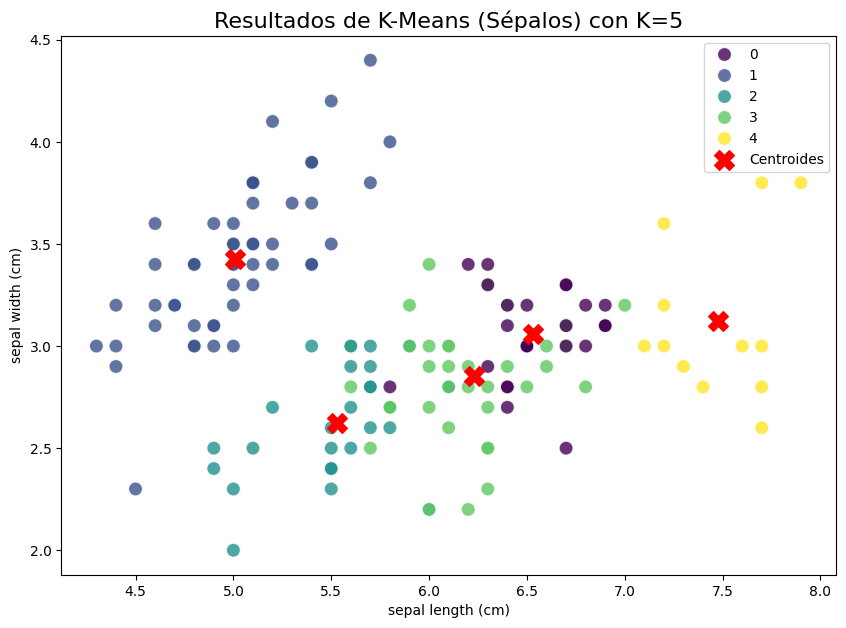

Análisis Visual: Observemos cómo los mismos grupos se ven diferentes según la vista.


In [28]:
# -------------------------------------------------------
# GRÁFICO 2: SÉPALOS (Sepal Length vs Sepal Width)
# -------------------------------------------------------
print("\nGenerando gráfico para SÉPALOS...")
plt.figure(figsize=(10, 7))

# Usamos las columnas de sépalos
sns.scatterplot(
    data=df_iris,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='Cluster',       # Mismo cluster, distinta vista
    palette='viridis',
    s=100,
    alpha=0.8
)

# Graficamos los CENTROIDES correspondientes a sépalos
# Sépalos son índices 0 y 1.
plt.scatter(
    kmeans.cluster_centers_[:, 0], # X del centroide (Largo Sépalo)
    kmeans.cluster_centers_[:, 1], # Y del centroide (Ancho Sépalo)
    c='red', s=200, marker='X', label='Centroides'
)

plt.title('Resultados de K-Means (Sépalos) con K=5', fontsize=16)
plt.legend()
plt.show()

print("Análisis Visual: Observemos cómo los mismos grupos se ven diferentes según la vista.")

### Consigna 5:
##### Por último, mediante el método del codo, determinemos cuál es el número de clusters ideales para realizar la agrupación.


---  Método del Codo (Buscando la K óptima) ---


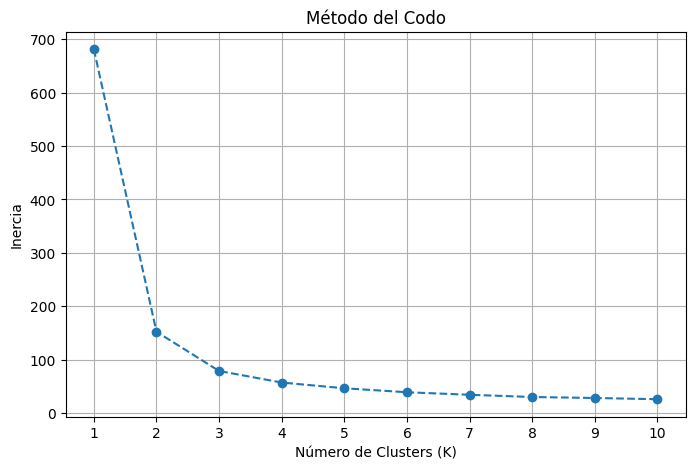

Conclusión: Observamos dónde la curva hace un 'codo'  en K=3).
Ese es el número óptimo de grupos para este dataset.


In [30]:

# Método del Codo (Elbow Method)

# Para saber cuál es la K óptima, probamos varios valores (ej. de 1 a 10)
# y graficamos la inercia.

print("\n---  Método del Codo (Buscando la K óptima) ---")

inercias = []
rango_k = range(1, 11)

for k in rango_k:
    modelo_k = KMeans(n_clusters=k, n_init=10, random_state=42)
    modelo_k.fit(df_iris.iloc[:, :-1]) # Usamos df sin la columna 'Cluster' que agregamos antes
    inercias.append(modelo_k.inertia_)
    
# Graficamos la curva
plt.figure(figsize=(8, 5))
plt.plot(rango_k, inercias, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(rango_k)
plt.grid(True)
plt.show()

print("Conclusión: Observamos dónde la curva hace un 'codo'  en K=3).")
print("Ese es el número óptimo de grupos para este dataset.")